In [1]:
import pandas as pd
from collections import Counter
import re

df = pd.read_csv("contents.csv")

text = " "
for idx, row in df.iterrows():
    if row.Tokens:
        text += row.Text

In [2]:
cnt = Counter(re.split(r"[\s\.!'\"’]", text.lower()))
cnt.most_common(100)

[('', 2150456),
 ('de', 751936),
 ('que', 469660),
 ('le', 406247),
 ('la', 378773),
 ('&', 363323),
 ('l', 359396),
 ('en', 306680),
 ('vous', 305661),
 ('à', 299761),
 ('d', 280717),
 ('qu', 275199),
 ('il', 266801),
 ('ie', 251975),
 ('eſt', 239554),
 ('ne', 233664),
 ('les', 220658),
 ('qui', 220346),
 ('ce', 200409),
 ('et', 193737),
 ('vn', 189388),
 ('pour', 180968),
 ('a', 165649),
 ('n', 160399),
 ('me', 160122),
 ('mon', 153552),
 ('des', 134156),
 ('m', 125993),
 ('plus', 118869),
 ('ma', 111362),
 ('je', 111091),
 ('on', 102567),
 ('ſon', 102321),
 ('ſi', 101954),
 ('du', 99927),
 ('mais', 99047),
 ('pas', 93464),
 ('par', 92573),
 ('nous', 92317),
 ('i', 90997),
 ('au', 90258),
 ('s', 88113),
 ('bien', 84935),
 ('ſa', 84870),
 ('dans', 83883),
 ('tout', 81769),
 ('un', 81593),
 ('vne', 78270),
 ('c', 75667),
 ('ſe', 74138),
 ('elle', 72972),
 ('tu', 67555),
 ('mes', 64391),
 ('ay', 64157),
 ('voſtre', 63482),
 ('luy', 62432),
 ('fait', 58860),
 ('point', 56145),
 ('ſans',

In [3]:
Counter(text.lower())

Counter({' ': 21712565,
         'e': 16428090,
         's': 8179582,
         'u': 7069090,
         'a': 7002289,
         'r': 6946074,
         'i': 6852041,
         'n': 6753442,
         'o': 6293531,
         't': 6045859,
         'l': 4733028,
         'm': 3210024,
         'd': 3196968,
         'c': 3057105,
         'p': 2700308,
         ',': 2079126,
         'v': 1730363,
         '.': 1417385,
         'q': 1378555,
         '’': 1265870,
         'f': 1182013,
         'y': 956475,
         'g': 881845,
         'b': 869756,
         'h': 847973,
         '́': 615043,
         'x': 509167,
         '̀': 373974,
         'z': 370970,
         '&': 367771,
         'j': 337268,
         '-': 261531,
         "'": 255188,
         '?': 180453,
         ';': 176463,
         ':': 147024,
         '̂': 115799,
         '!': 100658,
         '̧': 95295,
         'œ': 89314,
         '̈': 84964,
         '̃': 63488,
         '1': 27530,
         'ß': 26861,
         '2': 1

In [3]:
import unicodedata
pairs = [["vn", "un"], ["vne", "une"], ["ie", "je"], ["estre", "être"], ["auec", "avec"]]
chars = ["s", "ſ"]

for pair in pairs:
    for tok in pair:
        df[tok] = 0
for char in chars:
    df[char] = 0 


for idx, row in df.iterrows():
    if row.Date > 1700:
        continue
    if row.Tokens:
        for char in chars:
            df.loc[idx, char] = row.Text.count(char)
        local_count = Counter(re.split(r"[\s\.!'\"’]", row.Text.lower()))
        for pair in pairs:
            for token in pair:
                df.loc[idx, token] = local_count.get(unicodedata.normalize("NFD", token), 0)

<Figure size 1000x600 with 0 Axes>

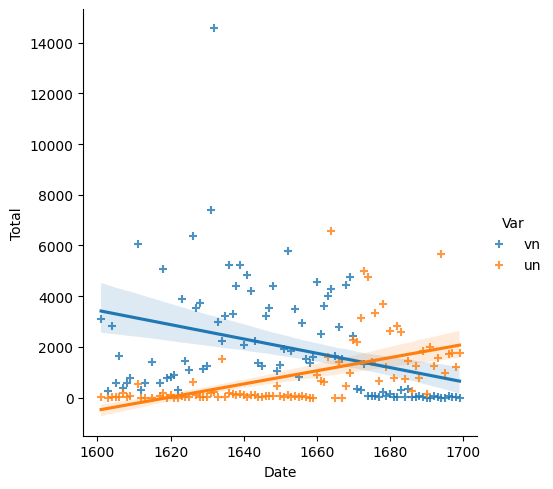

<Figure size 1000x600 with 0 Axes>

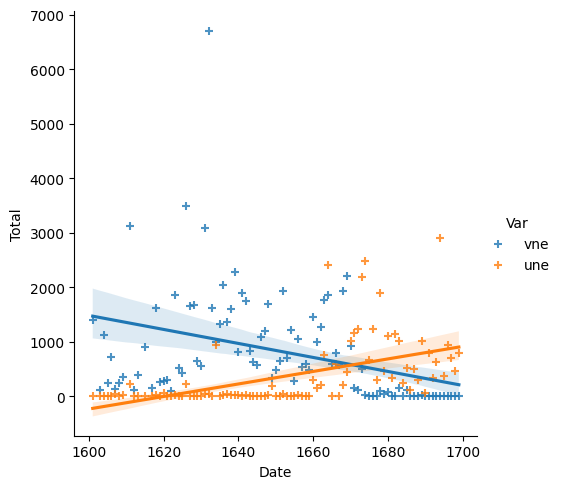

<Figure size 1000x600 with 0 Axes>

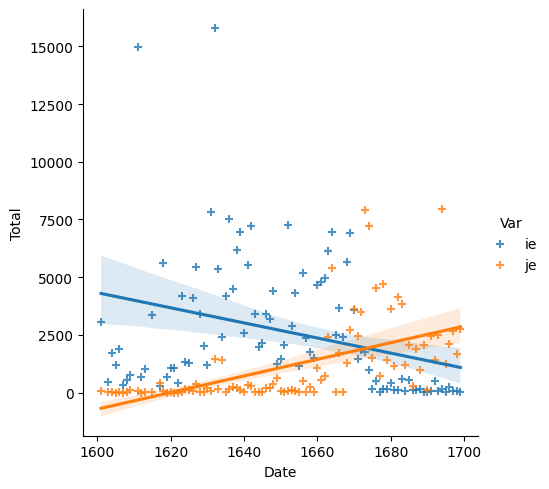

<Figure size 1000x600 with 0 Axes>

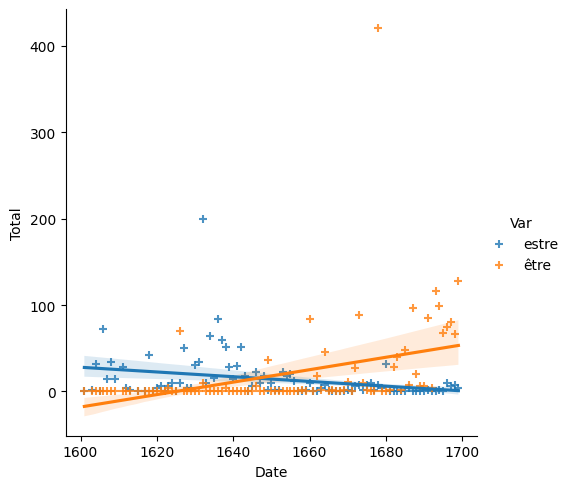

<Figure size 1000x600 with 0 Axes>

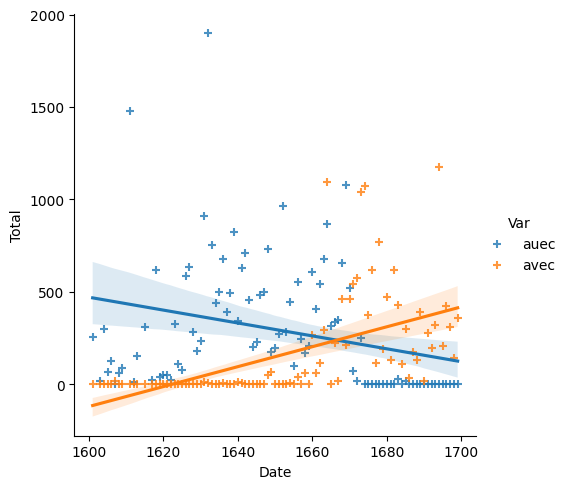

<Figure size 1000x600 with 0 Axes>

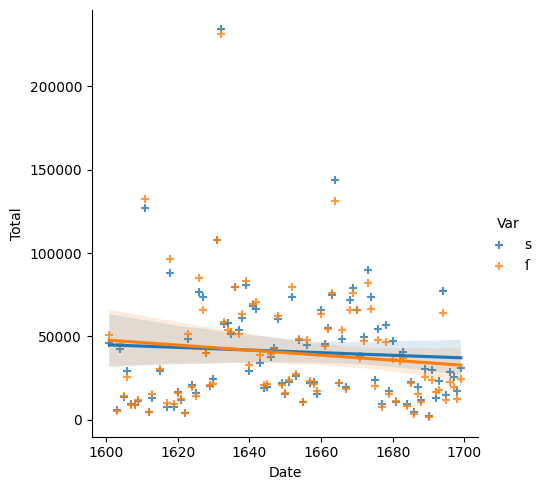

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

# sns.displot(data=df, x="Date", y="s")

# sns.scatterplot(
#     df.groupby("Date").sum(["ie", "je"]).reset_index(),
#     x="Date",
#     y=["ie", "je"]
# )
for pair in pairs + [chars]:
    new_df = []
    for _, row in df[df.Date < 1700].groupby("Date").sum(pair).reset_index().iterrows():
        for token in pair:
            new_df.append({"Date": row.Date, "Var": token, "Total": row[token]})
    new_df = pd.DataFrame(new_df)
    plt.figure(figsize=(10, 6))
    sns.lmplot(new_df, x="Date", y="Total", hue="Var", markers="+")
    